In [1]:
import roadrunner
import tellurium as te
from multiprocessing import Pool
import seaborn as sn
import pandas as pd
import scipy as sp
import numpy as np
import csv
import operator
import random
from datetime import datetime
import matplotlib.pyplot as plt
import sys
import os
import warnings
warnings.filterwarnings("ignore")
roadrunner.Logger_disableConsoleLogging()
# roadrunner.Logger_enableConsoleLogging(3)

In [2]:
directory = "/Users/feng626/sysSynBio/CancerBio/egfrActivation/EGFRActivation/"
tag = 0

with open(directory + "egfrActivation.sb") as f:
    egfrActivationModel = f.read()

model = te.loada(egfrActivationModel)
species = model.getFloatingSpeciesIds()
# model.reset()

egf = np.array([0.2, 0.4, 1.0, 2.5, 5.0, 10.0, 20.0, 100.0])
pegfr = np.array([[1.538, 1.639, 2.355, 1.899, 1.935, 1.790, 1.700, 0.781, 3.072],
                  [2.244, 1.943, 1.395, 1.749, 2.028, 2.039, 2.087, 1.108, 2.858],
                  [1.501, 2.935, 4.037, 5.768, 5.986, 7.527, 6.889, 7.812, 7.490],
                  [2.899, 9.543, 13.878, 18.940, 23.153,
                      27.694, 28.414, 34.901, 37.434],
                  [2.504, 13.263, 21.242, 31.053, 34.163,
                      37.691, 36.178, 47.017, 46.832],
                  [2.642, 12.110, 15.855, 28.133, 30.337,
                      29.640, 32.854, 31.818, 44.066],
                  [2.069, 18.130, 13.089, 24.388, 29.611,
                      36.226, 32.383, 37.782, 38.338],
                  [1.568, 20.861, 38.950, 38.886, 32.507, 32.372, 31.802, 30.657, 38.321]])

pegfrStd = np.array([[2.761, 2.510, 9.424, 4.139, 1.454, 5.456, 1.043, 1.674, 8.531],
                     [4.239, 5.368, 1.994, 3.809, 4.753,
                         7.857, 5.321, 7.262, 4.618],
                     [4.415, 4.692, 5.833, 5.214, 3.451,
                         14.933, 8.317, 4.091, 3.002],
                     [1.869, 4.165, 1.246, 6.793, 6.874,
                      10.611, 2.438, 14.655, 6.646],
                     [2.525, 6.282, 6.638, 7.443, 13.619,
                      3.516, 0.467, 7.783, 8.021],
                     [1.762, 2.914, 4.555, 11.463, 11.264,
                      23.662, 6.728, 13.159, 10.555],
                     [2.248, 5.310, 19.831, 4.977, 2.508,
                      7.178, 7.023, 5.578, 6.136],
                     [0.839, 7.993, 2.607, 6.204, 7.905, 11.694, 5.722, 2.411, 5.365]])

t0 = 0
teq = 5000
tf = 80
tnum = pegfr.shape[1]
egfLevels = len(egf)
tsnum = pegfr.shape[1] * 100

lowB = -5
highB = 5
parNum = 16

pegfr = np.vstack((np.linspace(t0, tf, tnum), pegfr))

In [3]:
def setParameter(model, pars):
    # model.Vr = pars[0]
    model.kf1 = pars[1]
    model.kf2 = pars[2]
    # model.ki = pars[3]
    # model.ke = pars[4]
    model.kp = pars[5]
    model.kd = pars[6]
    model.K1 = pars[7]
    model.K2 = pars[8]
    model.g1 = pars[9]
    model.g2 = pars[10]
    model.g3 = pars[11]
    model.g4 = pars[12]
    model.g5 = pars[13]
    model.g6 = pars[14]
    model.g7 = pars[15]
    return model

def getSims(pars, model=model):
    model = setParameter(model, pars)
    sims = [np.linspace(t0, tf, tsnum)]
    for i in range(egfLevels):
        model.reset()
        model.E = 0
        try:
            model.simulate(t0, teq, tnum)
            model.E = egf[i]
            eq = model.simulate(t0, tf, tsnum)
            tempSim = (eq["[RRp]"] + eq["[RRpE]"] + eq["[ERRpE]"] + 2 * (
                eq["[RpRp]"] + eq["[RpRpE]"] + eq["[ERpRpE]"]))
        except:
            warnings.warn('Simulation is not successful!', SimulationWarning)
            tempSim = np.zeros(tsnum)
        sims.append(tempSim)
    return np.array(sims)

## Fitting results 2020-11-05

In [165]:
scores = [np.genfromtxt(directory + "sims201105/trackingAll-" + str(tag) + ".csv", delimiter=',')[-1, 1] for tag in range(24)]
scores #0, 1, 6, 16, 17, 23

[1.986875751146205,
 1.908788498306229,
 2.237726663203374,
 2.3066520024774935,
 2.0489520328758006,
 2.0061153973669397,
 1.911479988067043,
 2.058741459062255,
 2.07078132729626,
 2.0641127010037357,
 2.388727881327827,
 2.200247379256107,
 2.0707489105648875,
 2.066157911409882,
 2.0975356038193995,
 2.170032297959151,
 1.9739093246545603,
 1.9325705290599926,
 2.0250320738548973,
 2.0602752226474026,
 2.099690125532935,
 2.065093544435817,
 2.37212187569035,
 1.9368125771472413]

In [150]:
tag = 16
fit = np.genfromtxt(directory + "sims201105/trackingAll-" + str(tag) + ".csv", delimiter=',')[-1, 2:]
sims = getSims(10 ** fit)

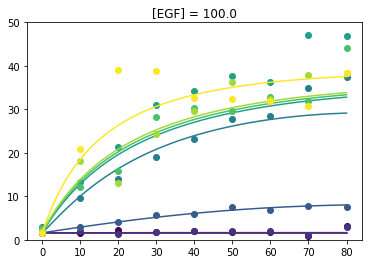

In [151]:
cmap = plt.get_cmap('viridis')
cols = [cmap(i) for i in np.linspace(0, 1, len(egf))]
for i in range(len(egf)):
    plt.plot(sims[0], sims[i + 1], color=cols[i])
    plt.plot(pegfr[0], pegfr[i + 1], color=cols[i],  marker='o', linestyle='')
    plt.ylim([0,50])
    plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 0.2')

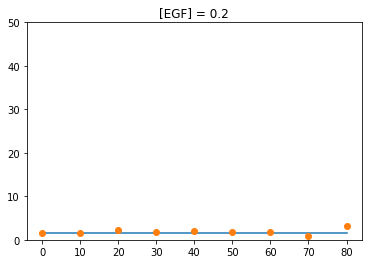

In [152]:
i = 0
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 0.4')

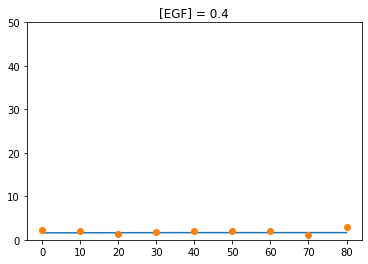

In [153]:
i = 1
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 1.0')

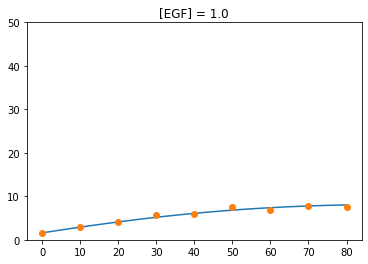

In [154]:
i = 2
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 2.5')

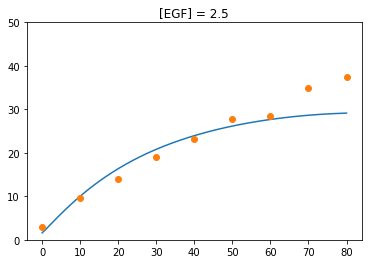

In [155]:
i = 3
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 5.0')

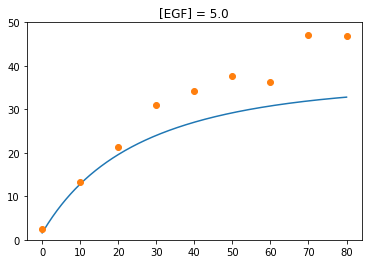

In [156]:
i = 4
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 10.0')

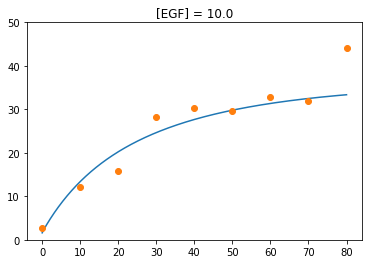

In [157]:
i = 5
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 20.0')

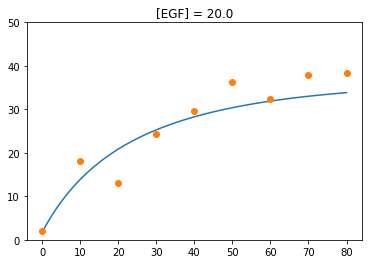

In [158]:
i = 6
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 100.0')

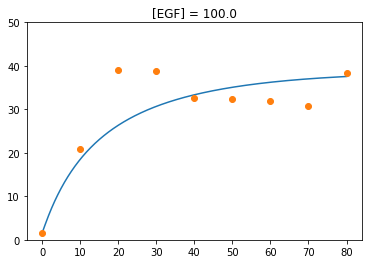

In [159]:
i = 7
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

In [160]:
tag = 6
fit = np.genfromtxt(directory + "sims201105/trackingAll-" + str(tag) + ".csv", delimiter=',')[-1, 2:]
sims = getSims(10 ** fit)

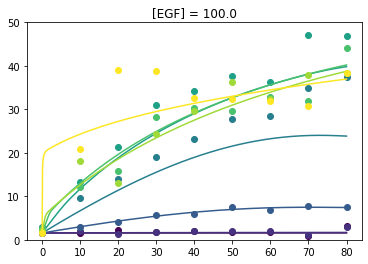

In [161]:
cmap = plt.get_cmap('viridis')
cols = [cmap(i) for i in np.linspace(0, 1, len(egf))]
for i in range(len(egf)):
    plt.plot(sims[0], sims[i + 1], color=cols[i])
    plt.plot(pegfr[0], pegfr[i + 1], color=cols[i],  marker='o', linestyle='')
    plt.ylim([0,50])
    plt.title("[EGF] = " + str(egf[i]))

## Fitting results 2020-11-24

In [4]:
scores = [np.genfromtxt(directory + "sims/trackingAll-" + str(tag) + ".csv", delimiter=',')[-1, 1] for tag in range(24)]
scores #0, 1, 6, 16, 17, 23

[0.3552113981877305,
 0.33044016837123275,
 0.36436937330333885,
 0.3737907244173485,
 0.36806323202920493,
 0.37347033208331126,
 0.3503825605708759,
 0.34753555975150213,
 0.35382156120085084,
 0.37280672951944727,
 0.3594533011094396,
 0.3940405346521804,
 0.35912179585883025,
 0.37374658618568807,
 0.3544072470248514,
 0.3511274216526982,
 0.37231386271415995,
 0.3479817340368173,
 0.3611938647710029,
 0.35473758838335917,
 0.3560990305264909,
 0.3490082565435615,
 0.3609356270053753,
 0.43077523497487546]

In [15]:
tag = 6 # 1, 2, 6, 12
fit = np.genfromtxt(directory + "sims/trackingAll-" + str(tag) + ".csv", delimiter=',')[-1, 2:]
sims = getSims(10 ** fit)
10 ** fit

array([1.49112970e+03, 5.46316193e+04, 5.50766390e-05, 8.07330452e-04,
       8.75358826e+04, 3.20996078e-03, 1.18009336e-05, 3.10547132e+03,
       7.06717295e+03, 5.55457054e-03, 1.27382270e-01, 4.61391701e-02,
       3.02753596e+02, 8.47740028e+00, 4.63286150e+02, 4.01419950e-01])

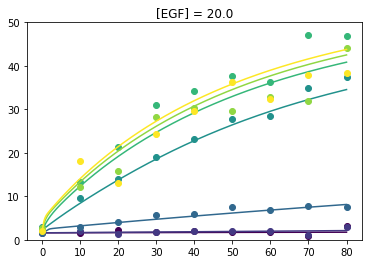

In [6]:
cmap = plt.get_cmap('viridis')
cols = [cmap(i) for i in np.linspace(0, 1, len(egf)-1)]
for i in range(len(egf)-1):
    plt.plot(sims[0], sims[i + 1], color=cols[i])
    plt.plot(pegfr[0], pegfr[i + 1], color=cols[i],  marker='o', linestyle='')
    plt.ylim([0,50])
    plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 0.2')

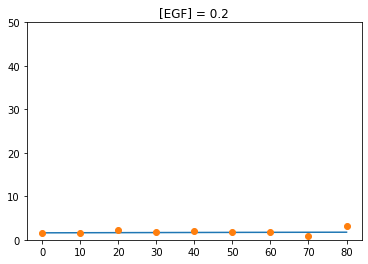

In [7]:
i = 0
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 0.4')

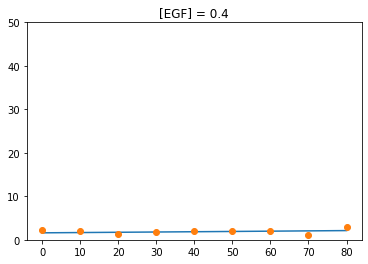

In [8]:
i = 1
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 1.0')

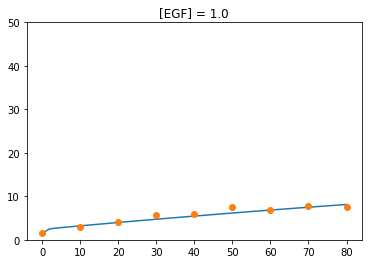

In [9]:
i = 2
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 2.5')

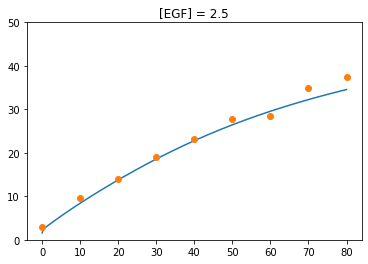

In [10]:
i = 3
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 5.0')

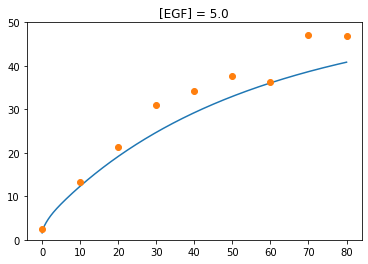

In [11]:
i = 4
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 10.0')

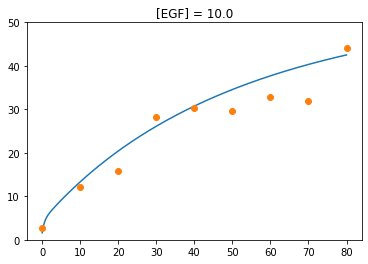

In [12]:
i = 5
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 20.0')

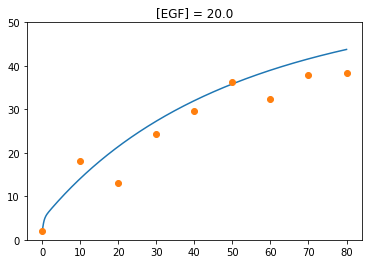

In [13]:
i = 6
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 100.0')

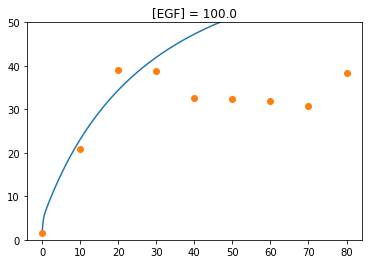

In [14]:
i = 7
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

#### Test

In [244]:
scores = [np.genfromtxt(directory + "sims-test/trackingAll-" + str(tag) + ".csv", delimiter=',')[-1, 1] for tag in range(24)]
scores #0, 1, 6, 16, 17, 23

[0.3706236646629391,
 0.41314272770478505,
 0.426751915083001,
 0.4275954213155875,
 0.425836040793741,
 0.4200763506919034,
 0.4993358218148504,
 0.4280388281323245,
 0.4270262835585948,
 0.41387670468689786,
 0.46060706906020055,
 0.5052409792368371,
 0.3937169933417476,
 0.42622826383445195,
 0.4180729661614083,
 0.42261807717704947,
 0.41530801277996693,
 0.39272961650810706,
 0.39672855592822515,
 0.42649935618098067,
 0.4741230569374795,
 0.4872177076717289,
 0.4663077485143719,
 0.4066161492345911]

In [245]:
tag = 0
fit = np.genfromtxt(directory + "sims-test/trackingAll-" + str(tag) + ".csv", delimiter=',')[-1, 2:]
sims = getSims(10 ** fit)

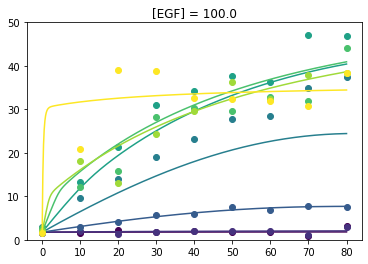

In [246]:
cmap = plt.get_cmap('viridis')
cols = [cmap(i) for i in np.linspace(0, 1, len(egf))]
for i in range(len(egf)):
    plt.plot(sims[0], sims[i + 1], color=cols[i])
    plt.plot(pegfr[0], pegfr[i + 1], color=cols[i],  marker='o', linestyle='')
    plt.ylim([0,50])
    plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 0.2')

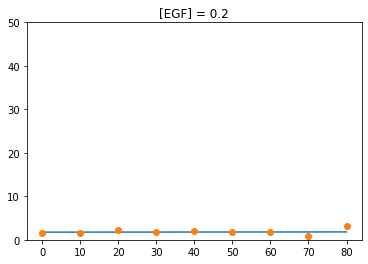

In [247]:
i = 0
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 0.4')

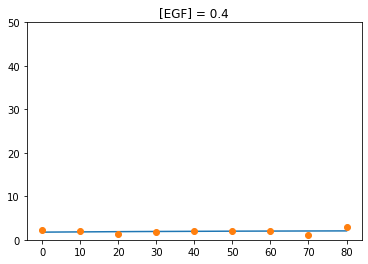

In [248]:
i = 1
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 1.0')

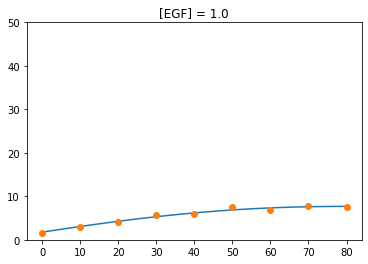

In [249]:
i = 2
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 2.5')

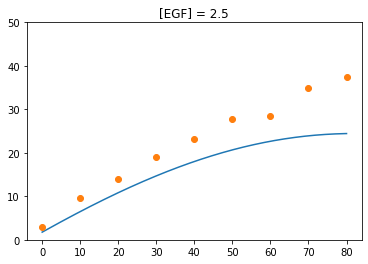

In [250]:
i = 3
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 5.0')

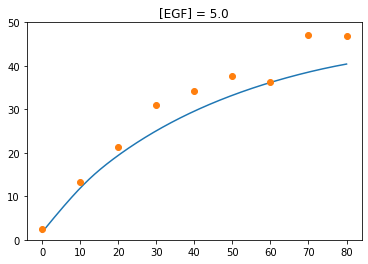

In [251]:
i = 4
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 10.0')

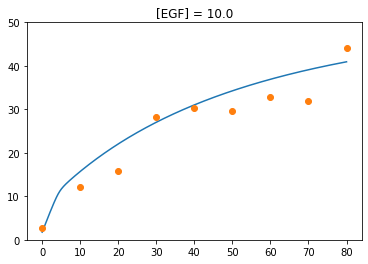

In [252]:
i = 5
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 20.0')

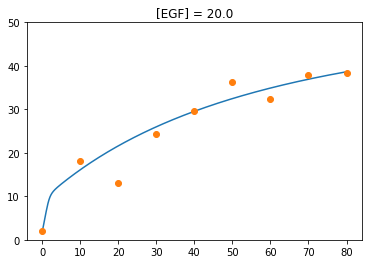

In [253]:
i = 6
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))

Text(0.5, 1.0, '[EGF] = 100.0')

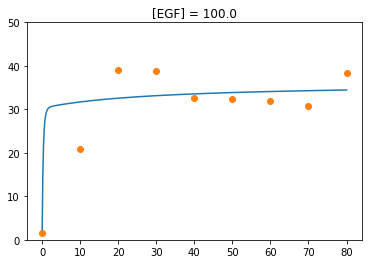

In [254]:
i = 7
plt.plot(sims[0], sims[i + 1])
plt.plot(pegfr[0], pegfr[i + 1], marker='o', linestyle='')
plt.ylim([0,50])
plt.title("[EGF] = " + str(egf[i]))